# Python Proyect for Data Science

In [30]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

### Question 1 - Extracting Tesla Stock Data Using yfinance

In [24]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

In [23]:
def tail(data, n=5):
    return data.tail(n)
tail(tesla_data, 10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3258,2023-06-08 00:00:00-04:00,224.220001,235.229996,223.009995,234.860001,164489700,0.0,0.0
3259,2023-06-09 00:00:00-04:00,249.070007,252.419998,242.020004,244.399994,199882300,0.0,0.0
3260,2023-06-12 00:00:00-04:00,247.940002,250.970001,244.589996,249.830002,150337900,0.0,0.0
3261,2023-06-13 00:00:00-04:00,253.509995,259.679993,251.339996,258.709991,162384300,0.0,0.0
3262,2023-06-14 00:00:00-04:00,260.170013,261.570007,250.500000,256.790009,170575500,0.0,0.0
3263,2023-06-15 00:00:00-04:00,248.399994,258.950012,247.289993,255.899994,160171200,0.0,0.0
3264,2023-06-16 00:00:00-04:00,258.920013,263.600006,257.209991,260.540009,167563700,0.0,0.0
3265,2023-06-20 00:00:00-04:00,261.500000,274.750000,261.119995,274.450012,165611200,0.0,0.0
3266,2023-06-21 00:00:00-04:00,275.130005,276.989990,257.779999,259.459991,211797100,0.0,0.0
3267,2023-06-22 00:00:00-04:00,250.770004,264.980011,248.250000,264.609985,166007038,0.0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping

#### Aclaration: I could not find the way to extract the information of the quarterly profit of any of the stocks so i did it with the annual reports.

In [7]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
html_data = requests.get(url).text
soup = BeautifulSoup(html_data,"html5lib")
table = soup.find('table', class_='historical_data_table')
rows = table.find_all('tr')

In [8]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for row in rows[1:]:
    cols = row.find_all('td')
    
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})])

In [9]:
tesla_revenue

,Date,Revenue
0,2022,81462
0,2021,53823
0,2020,31536
0,2019,24578
0,2018,21461
0,2017,11759
0,2016,7000
0,2015,4046
0,2014,3198
0,2013,2013


In [27]:
def tail(url, num_rows=5):
    html_data = requests.get(url).text
    soup = BeautifulSoup(html_data, "html5lib")
    table = soup.find('table', class_='historical_data_table')
    rows = table.find_all('tr')
    data = []
    for row in rows[-num_rows:]:
        cols = row.find_all('td')
        row_data = [col.get_text(strip=True) for col in cols]
        data.append(row_data)
    return data
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
tail_data = tail(url, 10)
for row in tail_data:
    print(row)

['2018', '$21,461']
['2017', '$11,759']
['2016', '$7,000']
['2015', '$4,046']
['2014', '$3,198']
['2013', '$2,013']
['2012', '$413']
['2011', '$204']
['2010', '$117']
['2009', '$112']


In [26]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
tail_data = tail(url, 10)
for row in tail_data:
    print(row)

['2018', '$21,461']
['2017', '$11,759']
['2016', '$7,000']
['2015', '$4,046']
['2014', '$3,198']
['2013', '$2,013']
['2012', '$413']
['2011', '$204']
['2010', '$117']
['2009', '$112']


### Question 3 - Extracting GameStop Stock Data Using yfinance

In [10]:
GameStop = yf.Ticker("GME")

In [11]:
GameStop_data = GameStop.history(period="max")

In [12]:
GameStop_data.reset_index(inplace=True)
GameStop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [13]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data,"html5lib")
table = soup.find('table', class_='historical_data_table')
rows = table.find_all('tr')

In [14]:
GameStop_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for row in rows[1:]:
    cols = row.find_all('td')
    
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        
        GameStop_revenue = pd.concat([GameStop_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})])

In [15]:
GameStop_revenue

,Date,Revenue
0,2023,5927
0,2022,6011
0,2021,5090
0,2020,6466
0,2019,8285
0,2018,8547
0,2017,7965
0,2016,9364
0,2015,9296
0,2014,9040


#### Aclaration: the tail function only returned one year

### Question 5 - Tesla Stock and Revenue Dashboard

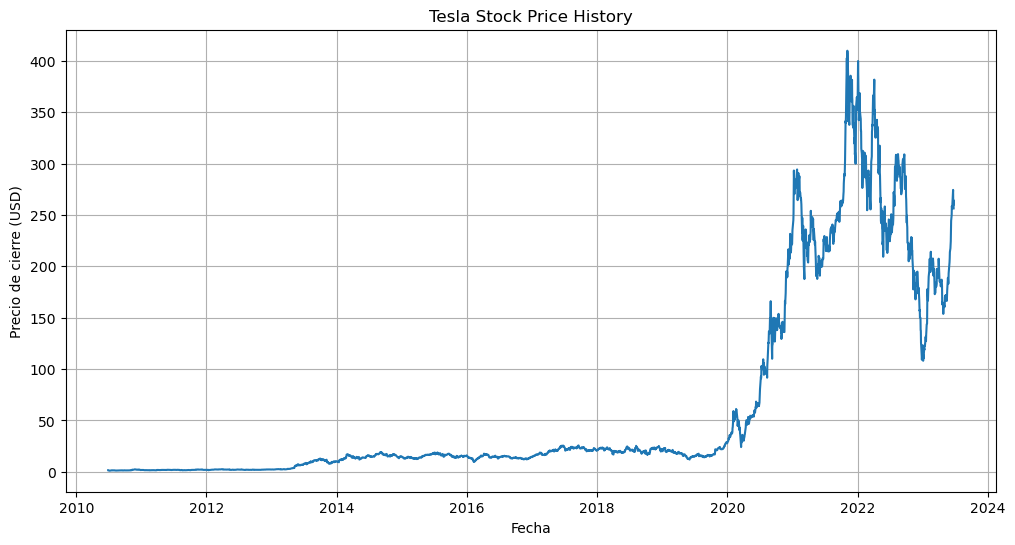

In [35]:
def make_graph(symbol):
    tesla = yf.Ticker(symbol)
    tesla_data = tesla.history(period="max")
    plt.figure(figsize=(12, 6))
    plt.plot(tesla_data.index, tesla_data['Close'])
    plt.title('Tesla Stock Price History')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de cierre (USD)')
    plt.grid(True)
    plt.show()
make_graph("TSLA")

### Question 6: Plot GameStop Stock Graph

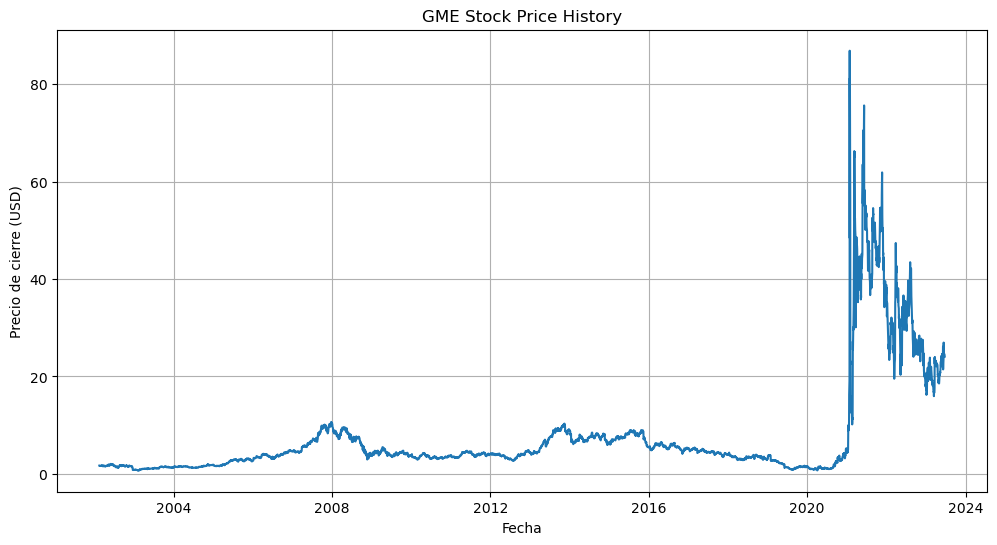

In [39]:
def make_graph(symbol):
    gme = yf.Ticker(symbol)
    gme_data = gme.history(period="max")
    plt.figure(figsize=(12, 6))
    plt.plot(gme_data.index, gme_data['Close'])
    plt.title('GME Stock Price History')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de cierre (USD)')
    plt.grid(True)
    plt.show()
make_graph("GME")